In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import variablen as var
import matplotlib.pyplot as plt
from quilt.data.ResidentMario import missingno_data as mno
from sklearn import linear_model
%matplotlib inline

In [2]:
methode = var.methode_3

In [3]:
save_dir = var.result_dir + methode + "/"

In [4]:
mar_files = os.listdir(var.mar_dir)

In [5]:
mcar_files = os.listdir(var.mcar_dir)

In [6]:
mnar_files = os.listdir(var.mnar_dir)

In [7]:
df_original  = pd.read_csv(var.prepaired_df, delimiter=";", decimal=",")

In [8]:
def correlation(dataset, column):
    threshold = -1
    col_corr = ""
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold and corr_matrix.iloc[i, j] != 1 and corr_matrix.columns[j] == column :
                threshold = corr_matrix.iloc[i, j]
                col_corr = corr_matrix.columns[i]
    return col_corr

In [9]:
def imputation(df,column,col_corr):
    s = df[col_corr].drop_duplicates().dropna()
    for i, v in s.items():
        #print(col_corr)
        temp = df[df[col_corr] == v][column].dropna()
        med = temp.median()
        new_df = df[df[col_corr] == v ]
        #print(new_df[column].count())
        #print(df[column].count())
        new_df.fillna(med, inplace=True)
        #print(new_df[column].count())
        df.update(new_df)
        #print(df[column].count())
        #print("LASSSSSSSSSSSSSSSSSSSSSSSSSS")
        #df[df[col_corr] == v & df[column].isna() ][column] = median
        #print(df[df[col_corr] == v][column].fillna("Lasse", inplace=True)  )  
        #print(df[df[col_corr] == v][column].fillna(df[df[col_corr] == v].median()[column], inplace=True)  )  
    return df

In [10]:
def execute(file,column,col_corr):
    df = pd.read_csv(file, delimiter=";", decimal=",")
    print(df[column].count())
    result = imputation(df,column,col_corr) 
    print(result[column].count())
    return result[column]

394990


C:\Users\GreenBook\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


434230
348196
420768
306199
398995
262841
367637
221923
330221
175082
279054
130500
222782
86900
157937
395156


C:\Users\GreenBook\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


434204
351649
421042
305918
398550
262804
368470
219898
329704
176587
281899
132638
224253
87629
158478


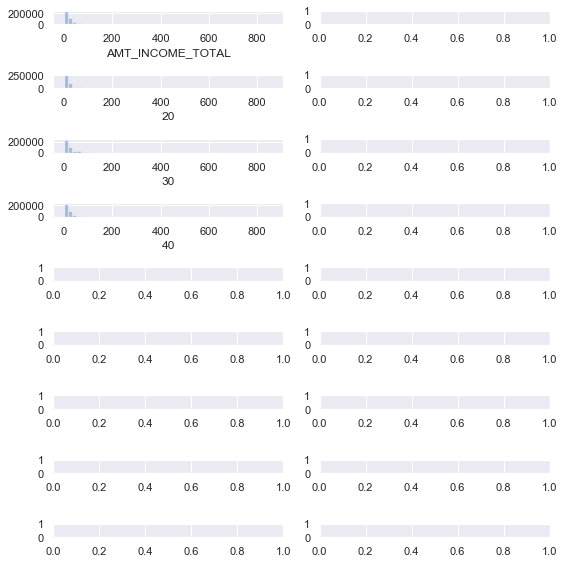

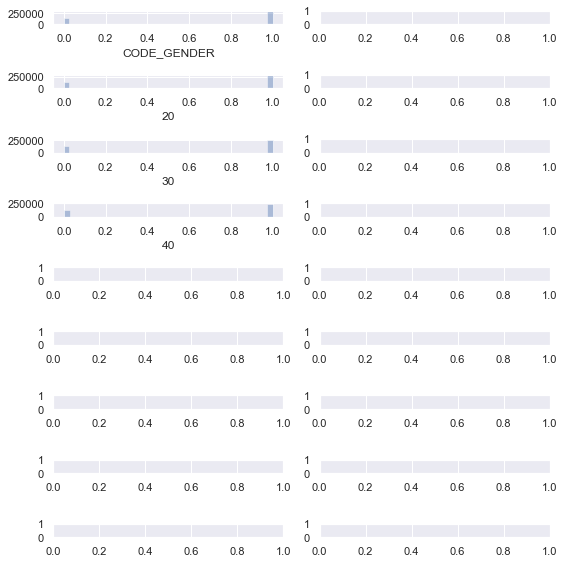

In [11]:
for column in var.columns:
    results = df_original[[column]].copy()
    col_corr = correlation(df_original, column)
    for i in mar_files:
        results[i[0:-4]] = execute(var.mar_dir + i, column,col_corr )
    results.to_csv( save_dir  + 'MAR/' + column + '.csv'  ,index=False,sep=';', decimal=',')
    
    
    sb.set()
    fig, axes = plt.subplots(nrows = 9, ncols = 2)
    fig.set_size_inches(8, 8)

    for index, variable in enumerate([column, "20","30","40"]):
        sb.distplot(results[variable].dropna(), kde = False, ax = axes[index, 0])
        #sb.distplot(deter_data["Det" + variable], kde = False, ax = axes[index, 0], color = 'red')
        #deter_data["Det" + variable]],
        #sb.boxplot(data = pd.concat([results[variable],  axis = 1), ax = axes[index, 1])
        plt.tight_layout()

In [15]:
for column in var.columns:
    results = df_original[[column]].copy()
    for i in mcar_files:
        results[i[0:-4]] = execute(var.mcar_dir + i, column)
    results.to_csv( save_dir  + 'MCAR/' + column + '.csv'  ,index=False,sep=';', decimal=',')

AMT_INCOME_TOTAL
394530
434219
AMT_INCOME_TOTAL
351314
421066
AMT_INCOME_TOTAL
307400
399207
AMT_INCOME_TOTAL
263342
368578
AMT_INCOME_TOTAL
219553
329265
AMT_INCOME_TOTAL
175361
280660
AMT_INCOME_TOTAL
130795
223124
AMT_INCOME_TOTAL
88165
158022
CODE_GENDER
394769
434174
CODE_GENDER
350710
420996
CODE_GENDER
307447
399171
CODE_GENDER
263012
368201
CODE_GENDER
218851
328620
CODE_GENDER
175110
280289
CODE_GENDER
131273
223526
CODE_GENDER
87880
157804


In [24]:
for column in var.columns:
    print(df_original[[column]].describe())
    results = df_original[[column]].copy()
    for i in mnar_files:
        results[i[0:-4]] = execute(var.mnar_dir + i, column)
    results.to_csv( save_dir  + 'MNAR/' + column + '.csv'  ,index=False,sep=';', decimal=',')

       AMT_INCOME_TOTAL
count     438557.000000
mean          27.432537
std           58.753444
min            0.000000
25%            6.000000
50%           14.000000
75%           25.000000
max          865.000000
AMT_INCOME_TOTAL
436230


C:\Users\GreenBook\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


438552
count    438552.000000
mean         26.361636
std          53.789765
min           0.000000
25%           6.000000
50%          14.000000
75%          23.000000
max         864.000000
Name: AMT_INCOME_TOTAL, dtype: float64
AMT_INCOME_TOTAL
121545
414955
count    414955.000000
mean          3.892053
std           1.424667
min           0.000000
25%           4.000000
50%           4.000000
75%           4.000000
max          19.000000
Name: AMT_INCOME_TOTAL, dtype: float64
AMT_INCOME_TOTAL
59514
367742
count    367742.000000
mean          1.402888
std           0.742224
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: AMT_INCOME_TOTAL, dtype: float64
AMT_INCOME_TOTAL
36355
313099
count    313099.000000
mean          1.042427
std           0.293801
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: AMT_INCOME_TOTAL, dtype: float64
AMT_INCOME

C:\Users\GreenBook\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


438557
count    438557.000000
mean          0.671381
std           0.469712
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: CODE_GENDER, dtype: float64
CODE_GENDER
422161
431882
count    431882.000000
mean          0.662079
std           0.473002
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: CODE_GENDER, dtype: float64
CODE_GENDER
384218
416905
count    416905.000000
mean          0.639959
std           0.480013
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: CODE_GENDER, dtype: float64
CODE_GENDER
331697
394320
count    394320.000000
mean          0.606041
std           0.488627
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: CODE_GENDER, dtype: float64
CODE_GENDER
270331
359657
count    359657.0

In [ ]:
 #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(df[parameters])
    std_error = (predict[df[feature].notnull()] - df.loc[df[feature].notnull(), feature + '_imp']).std()

In [ ]:
#observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size = df[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data.loc[(df[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(df[feature].isnull()) & 
                                                                            (random_predict > 0)]

In [ ]:
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(df[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.distplot(random_data["Ran" + variable], kde = False, ax = axes[index, 0], color = 'red')
    axes[index, 0].set(xlabel = variable + " / " + variable + '_imp')
    
    sns.boxplot(data = pd.concat([df[variable], random_data["Ran" + variable]], axis = 1),
                ax = axes[index, 1])
    
    plt.tight_layout()